In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


#Carga inicial
df = sm.datasets.get_rdataset("USArrests", "datasets").data

#A ver si cargo bien
print(df.head())

print("\nAlgunas estadisticas de los datos:")
print(df.describe())

Primeras 5 filas del dataset:
            Murder  Assault  UrbanPop  Rape
rownames                                   
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

Algunas estadisticas de los datos:
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


Se ven que la escala de algunos valores es grande, por ejemplo Assault tiene una desviacion de 83 mientras que Murder solo de 0,8.
Antes de hacer PCA seria bueno estandarizar los datos para que las magnitudes de cada variable sean mas comparables.

In [7]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_standarizados = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

#Datos ahora con la estandarizacion realizada
print(df_standarizados.describe())



             Murder       Assault      UrbanPop          Rape
count  5.000000e+01  5.000000e+01  5.000000e+01  5.000000e+01
mean  -7.105427e-17  1.387779e-16 -4.396483e-16  8.593126e-16
std    1.010153e+00  1.010153e+00  1.010153e+00  1.010153e+00
min   -1.620693e+00 -1.524362e+00 -2.340661e+00 -1.502548e+00
25%   -8.611383e-01 -7.486054e-01 -7.704502e-01 -6.640245e-01
50%   -1.247758e-01 -1.425453e-01  3.210209e-02 -1.220847e-01
75%    8.029251e-01  9.483628e-01  8.521012e-01  5.330962e-01
max    2.229265e+00  2.015028e+00  1.776781e+00  2.671197e+00


Ahora vemos que la desviacion se encuentra en el entorno de 1 en todas las variables.

In [ ]:
from sklearn.decomposition import PCA

#PCA
pca = PCA()
componentes_principales = pca.fit_transform(df_standarizados)

# Varianza de cada componente
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Aumento de varianza a medida que se añaden componentes:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"  PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print("\nVarianza acumulada:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"  Hasta PC{i+1}: {cum_var:.4f} ({cum_var*100:.2f}%)")

# Vectores propios de cada pca
vp_df = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(df.columns))], index=df.columns)
print("\nCargas de los componentes principales:")
print(vp_df)

Aumento de varianza a medida que se añaden componentes:
  PC1: 0.6201 (62.01%)
  PC2: 0.2474 (24.74%)
  PC3: 0.0891 (8.91%)
  PC4: 0.0434 (4.34%)

Varianza acumulada:
  Hasta PC1: 0.6201 (62.01%)
  Hasta PC2: 0.8675 (86.75%)
  Hasta PC3: 0.9566 (95.66%)
  Hasta PC4: 1.0000 (100.00%)

Cargas de los componentes principales:
               PC1       PC2       PC3       PC4
Murder    0.535899 -0.418181 -0.341233 -0.649228
Assault   0.583184 -0.187986 -0.268148  0.743407
UrbanPop  0.278191  0.872806 -0.378016 -0.133878
Rape      0.543432  0.167319  0.817778 -0.089024


Con esto notamos que con 2 componentes podemos obtener ya el 86% de la varianza total y con 3 ya mas del 95%.
Para un analisis real se podria emplear un pca con 2 o 3 componentes sin miedo a una perdida grande de informacion.

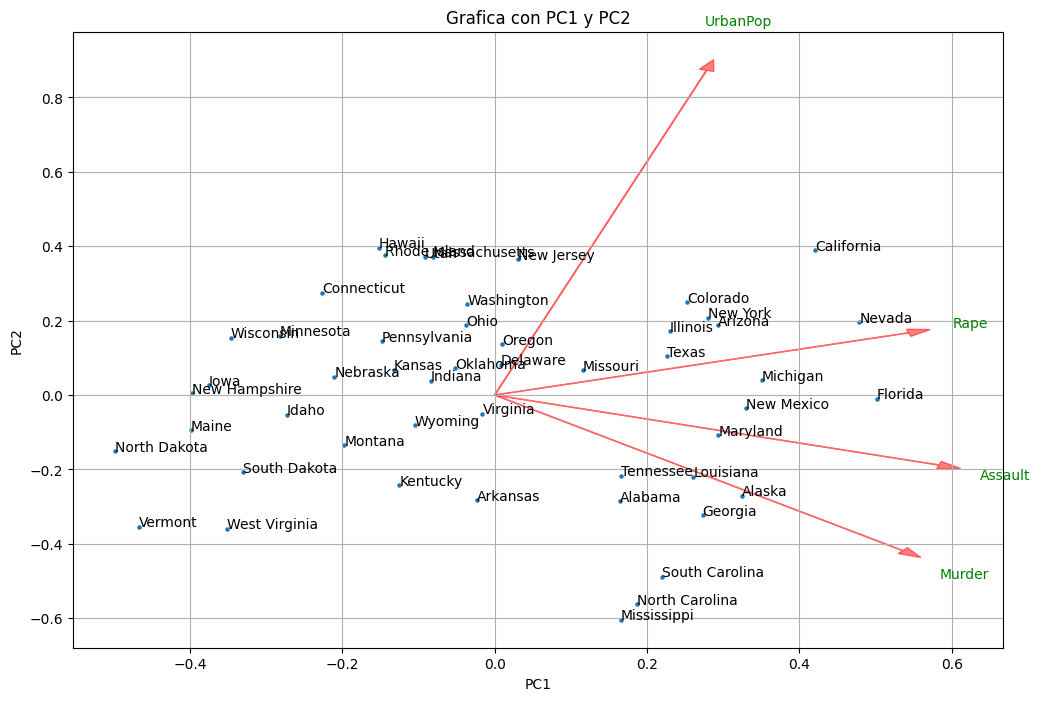

In [22]:
def biplot(score, coeff, labels=None):
    xs = score[:,0] # PC1
    ys = score[:,1] # PC2
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.figure(figsize=(12, 8))
    plt.scatter(xs * scalex, ys * scaley, s=5)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5, head_width=0.02)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
        
    for i, txt in enumerate(df.index):
        plt.annotate(txt, (xs[i] * scalex, ys[i] * scaley))
        
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Grafica con PC1 y PC2")
    plt.grid()
    plt.show()

# Llamamos a la función para crear el biplot
biplot(componentes_principales, np.transpose(pca.components_), list(df.columns))

En esta grafica se muestran los datos de los distintos estados, ya estandarizados, empleando los dos primeros componenetes principales. Ademas, en rojo, se muestra la direcion de crecimiento de las distintas variables(Murder, Assault, Rape y UrbanPop) donde se ve de una manera mas visual que Murder, Assault y Rape tienen un peso mas importante ne la PC1 mientras que UrbanPop es mas predominante en PC2.